In [1]:
import pandas as pd
# Set max columns to display
pd.set_option('display.max_columns', None)
import numpy as np
from sklearn import preprocessing as pre
import matplotlib.pyplot as plt

C:\Users\austinsh\AppData\Local\Temp\ipykernel_16316\753047149.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Importing CSV files

Switching to a gitHub source for CSV imports


url = 'paste_the_raw_github_url_here'

df = pd.read_csv(url)


Below is the code for on-prem data import

In [2]:
# ########################################################################################################################
# ##############################                                                            ##############################
# ##############################                           IMPORT DATA                      ##############################      
# ##############################                                                            ##############################
# ########################################################################################################################
LIMS = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\2023 DATA\LIMS.csv")
UNIT = pd.read_csv(r"C:\Users\austinsh\Project-OptiC4\II Data\1 Collection\CSV\2023 DATA\UNIT.csv")



In [3]:
# Assuming your dataframes are stored in a list like this:
dataframes = [LIMS, UNIT
                ]

duplicates = []

# Compare each dataframe with every other dataframe
for i, df1 in enumerate(dataframes):
    for j, df2 in enumerate(dataframes):
        if i != j and df1.equals(df2):
            duplicates.append((i, j))

# Report the results
if duplicates:
    print("Duplicate dataframes found:")
    for i, j in duplicates:
        print(f"Dataframe at index {i} is the same as dataframe at index {j}.")
else:
    print("No duplicate dataframes found.")



No duplicate dataframes found.


In [4]:
# Concatenate (union) the dataframes
df = pd.concat([LIMS, UNIT], ignore_index=True)

print(df.head())


              Date            ID    Value
0  01/01/2023 0:00  AS73425-3%Al  6.15928
1  01/01/2023 1:00  AS73425-3%Al  6.15935
2  01/01/2023 2:00  AS73425-3%Al  6.15942
3  01/01/2023 3:00  AS73425-3%Al  6.15948
4  01/01/2023 4:00  AS73425-3%Al  6.15955


In [5]:
# Assuming df is your DataFrame and 'ID' is the column
distinct_ids = df['ID'].unique()

print("Distinct IDs:")
print(distinct_ids)

Distinct IDs:
['AS73425-3%Al' 'AS74550-4ButanolPP' 'AS74550-4DecanolPP'
 'AS74550-4EthanolPP' 'AS74550-4HexanolPP' 'AS74550-4OctanolPP'
 'AS74550-25%C2OH' 'AS74550-25%nC6OH' 'AS74550-25%H2O'
 'AS74550-10%M-Value' 'AS74550-1%Al2O3' 'AS74550-5ppmNa2O'
 'AS74550-5%NH4OH' 'DI55102' 'DI55152' 'DI55580' 'FC55003' 'FC55009'
 'FC55552' 'FC55569' 'FC55576' 'FFC55553' 'FFC55555' 'LC55557' 'LC90366'
 'LC90368' 'PI55020' 'TC55552' 'TI55021']


IDs to drop - if needed. 

In [6]:
ids_to_drop = [

# #     # Potential Filtering or Blocking data
#         # Atomizer Data
#    "FC52018", "TI52014", "VI52558B", "II52554", 'DI52018',
#         # Stripper pressures
#    "PI55560", "PI55004", "PI55020", "TI40050", 
#         # Categorical valve postions
#    "HS90911", "HS52551", 'XV90911',
    
#     # Not Targeting with the Model
#    "AS74550-4EthanolPP", "AS74550-4HexanolPP", "AS74550-4OctanolPP"
 ]

# # Drop rows with specified IDs
# df = df[~df['ID'].isin(ids_to_drop)]

# # df.columns

# Final Dataset Cleaning

## These are the Butanol required Features:

### Muted for Decanol Development: 
Perhaps consider not returning here to run the page. Instead create a function from this page and call it when needed to re-"preprocess." The re-Preprocess ensure minimal data loss due to drops from other features that are not part of the final feature selection.

In [7]:
# ids_to_keep = ['AS73425-3%Al', 'AS74550-4ButanolPP',
#                     'FC55569', 'DI55152', 'TC55552',
#                     'FC55003', 'LC55555', 'FFC55553',
#                     'FFC55555', 'TI55021',
#                     'PI55004', 'FC55552',
                                 
#                'AS74550-25%C2OH', 'AS74550-25%nC4OH',
#                'AS74550-25%H2O', 'AS74550-10%M-Value', 
#                'AS74550-5%pH', 'AS74550-5%NH4OH'
               # ]
   # 'AS74550-4DecanolPP': 'Decanol',, 'AS74550-5ppmNa2O', 'AS74550-25%nC6OH' 'TC55555',

# Keep only rows with specified IDs
# df = df[df['ID'].isin(ids_to_keep)]

In [8]:
print(df.shape[0])

# 3555736 - Before change to include all features (assuming its the butanol only req attributes)
# 11313917 - After including all features


254040


In [9]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M', errors='coerce')

print(df.head())

                 Date            ID    Value
0 2023-01-01 00:00:00  AS73425-3%Al  6.15928
1 2023-01-01 01:00:00  AS73425-3%Al  6.15935
2 2023-01-01 02:00:00  AS73425-3%Al  6.15942
3 2023-01-01 03:00:00  AS73425-3%Al  6.15948
4 2023-01-01 04:00:00  AS73425-3%Al  6.15955


In [10]:
#Analysis of the larger yeallow area found an error in the timestamp conversiona
## Some timestamps were converted to "35" minutes instead of "25" minutes

#This will be corrected (yyyy-mm-dd hh:35:ss --> yyyy-mm-dd hh:00:ss)
# Assuming you have reset the index and kept the timestamp as a separate column named "Date"
#df['Date'] = df['Date'].apply(lambda dt: dt.replace(minute=0, second=0))

# Count rows where minute or second is not 0 before transformation
corrections_before = df[df['Date'].apply(lambda dt: dt.minute != 0 or dt.second != 0)].shape[0]

# Apply transformation
df['Date'] = df['Date'].apply(lambda dt: dt.replace(minute=0, second=0))

# The number of corrections is the count of rows where minute or second was not 0
print(f"{corrections_before} corrections were made.")


0 corrections were made.


In [11]:
#200208 - before duplicate dfs removed

# The data needs to be pivoted to:

# Unique row headers by 'Date'
# Unique column headers by 'ID'
# Values by 'Data'

#Previous attempt to pivot indicated Duplicates realtive to Date/ID
## These duplicates prevented the pivot

#First we must remove the duplicates then Pivot


In [12]:
#Identify the duplicates by all columns (Exact duplicates)

duplicate_counts = df.groupby(['Date', 'ID', 'Value']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]
print(duplicates_with_counts)

#165 10/24/23
#1378574 ALL DATA  ['Date', 'ID']
#1322098 ALL DATA  ['Date', 'ID', 'Data']

                      Date                  ID    Value  count
213774 2023-11-05 01:00:00  AS74550-10%M-Value  3.58701      2


In [13]:
df_clean = df.drop_duplicates(subset=['Date', 'ID', 'Value'])

In [14]:
########## Actual Duplicates to CSV file ##########

# # Find and print duplicates based on 'Date' and 'ID' columns
# duplicates = df[df.duplicated(subset=['Date', 'ID'], keep=False)]
# print(duplicates)

# duplicates.to_csv('duplicates.csv', index=False)


In [15]:
# Remove the Duplicates

#Analysis of duplicates based on ID and Date are not standard across Data for all 332 occurence
# Averaging would not be consitent across all duplicate because of the wide spread between various duplicate
#Therefore REMOVE all 332 as invalid instead of introducing bias arbitraiarly 

# Drop duplicates based on 'Date' and 'ID' columns from df_clean
print(df_clean.shape[0])

254039


In [16]:
#Identify the duplicates

duplicate_counts = df_clean.groupby(['Date', 'ID']).size().reset_index(name='count')
duplicates_with_counts = duplicate_counts[duplicate_counts['count'] > 1]
print(duplicates_with_counts)


                      Date                  ID  count
214368 2023-11-05 01:00:00        AS73425-3%Al      2
214369 2023-11-05 01:00:00     AS74550-1%Al2O3      2
214371 2023-11-05 01:00:00     AS74550-25%C2OH      2
214372 2023-11-05 01:00:00      AS74550-25%H2O      2
214373 2023-11-05 01:00:00    AS74550-25%nC6OH      2
214374 2023-11-05 01:00:00  AS74550-4ButanolPP      2
214375 2023-11-05 01:00:00  AS74550-4DecanolPP      2
214376 2023-11-05 01:00:00  AS74550-4EthanolPP      2
214377 2023-11-05 01:00:00  AS74550-4HexanolPP      2
214378 2023-11-05 01:00:00  AS74550-4OctanolPP      2
214379 2023-11-05 01:00:00     AS74550-5%NH4OH      2
214380 2023-11-05 01:00:00    AS74550-5ppmNa2O      2
214381 2023-11-05 01:00:00             DI55102      2
214382 2023-11-05 01:00:00             DI55152      2
214383 2023-11-05 01:00:00             DI55580      2
214384 2023-11-05 01:00:00             FC55003      2
214385 2023-11-05 01:00:00             FC55009      2
214386 2023-11-05 01:00:00  

In [17]:
# Assuming df_clean is your dataframe
df_clean = df_clean.drop_duplicates(subset=['Date', 'ID'], keep='first')


In [18]:
print(df_clean.shape[0])

254011


In [19]:
#Pivot the data
df_pivot = df_clean.pivot(index='Date', columns='ID', values='Value')

# Reset the index and keep the timestamp as a separate column named "Date"
df_pivot = df_pivot.reset_index()

df_pivot.head()


ID,Date,AS73425-3%Al,AS74550-1%Al2O3,AS74550-10%M-Value,AS74550-25%C2OH,AS74550-25%H2O,AS74550-25%nC6OH,AS74550-4ButanolPP,AS74550-4DecanolPP,AS74550-4EthanolPP,AS74550-4HexanolPP,AS74550-4OctanolPP,AS74550-5%NH4OH,AS74550-5ppmNa2O,DI55102,DI55152,DI55580,FC55003,FC55009,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC55557,LC90366,LC90368,PI55020,TC55552,TI55021
0,2023-01-01 00:00:00,6.15928,10.7617,3.91438,2.01591,21.4310,0.371104,2.73000,1.82000,10.8350,0.925000,1.15000,1.17224,3.03244,0.794854,1.03608,1.02379,6508.86,1209.84,37312.4,6349.08,-1.42229,0.899555,0.778317,65.8148,56.2628,56.2660,-0.886109,168.548,222.899
1,2023-01-01 01:00:00,6.15935,10.7619,3.90927,2.03131,21.4486,0.375208,2.87333,1.82667,11.3900,0.936667,1.16000,1.18665,3.15657,0.794854,1.03572,1.02384,6802.98,1230.90,36956.4,6350.78,-8.42350,0.899494,0.767947,65.8951,56.1547,56.1524,-0.923852,168.625,222.896
2,2023-01-01 02:00:00,6.15942,10.7620,3.90664,2.04672,21.4661,0.379313,3.01667,1.83333,11.9450,0.948333,1.17000,1.20105,3.28069,0.794854,1.03546,1.02419,6794.74,1311.79,37069.5,6351.45,-8.64741,0.900066,0.767544,66.0164,56.0493,56.0357,-0.924833,168.769,222.698
3,2023-01-01 03:00:00,6.15948,10.7622,3.90402,2.06212,21.4836,0.383417,3.16000,1.84000,12.5000,0.960000,1.18000,1.21545,3.40482,0.794854,1.03621,1.02476,6486.66,1395.94,36119.4,6348.80,-8.26089,0.906617,0.789515,65.9718,55.9456,55.9223,-1.013140,168.875,222.485
4,2023-01-01 04:00:00,6.15955,10.7624,3.90139,2.07753,21.5012,0.387521,3.26833,1.75500,12.8033,0.955000,1.13167,1.22985,3.52895,0.794854,1.03605,1.02513,6004.10,1548.14,37103.5,6348.74,3.61511,0.900075,0.768297,66.2930,55.8292,55.8115,-1.065310,169.012,223.161


In [20]:
num_columns = df_pivot.shape[1]
print("Number of features:", num_columns)

Number of features: 30


In [21]:
# Sample DataFrame

# Rename the columns
column_rename_dict = {
    'AS73425-3%Al': '425_pct_Al',
    'AS74550-4ButanolPP' : 'Butanol',
    'AS74550-4DecanolPP': 'Decanol',
    'AS74550-4EthanolPP': 'Ethanol',
    'AS74550-4HexanolPP': 'Hexanol',
    'AS74550-4OctanolPP': 'Octanol',
    'AS74550-25%C2OH': 'C4_pct_Eth',
    'AS74550-25%nC6OH': 'C4_pct_Hex',
    'AS74550-25%nC4OH': 'C4_pct_But',
    'AS74550-25%H2O': 'C4_pct_H2O',
    'AS74550-10%M-Value': 'M_Value',
    'AS74550-1%Al2O3': 'Al2O3',
    'AS74550-5%pH': 'HydWtr_pH',
    'AS74550-5ppmNa2O' : 'HydWtr_Na2O',
    'AS74550-5%NH4OH': 'HydWtr_pct_Ammonia'
}

df_pivot = df_pivot.rename(columns=column_rename_dict)

df_pivot


ID,Date,425_pct_Al,Al2O3,M_Value,C4_pct_Eth,C4_pct_H2O,C4_pct_Hex,Butanol,Decanol,Ethanol,Hexanol,Octanol,HydWtr_pct_Ammonia,HydWtr_Na2O,DI55102,DI55152,DI55580,FC55003,FC55009,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC55557,LC90366,LC90368,PI55020,TC55552,TI55021
0,2023-01-01 00:00:00,6.15928,10.7617,3.91438,2.01591,21.4310,0.371104,2.73000,1.82000,10.8350,0.925000,1.15000,1.17224,3.03244,0.794854,1.03608,1.023790,6508.86,1209.84,37312.4,6349.08,-1.42229,0.899555,0.778317,65.8148,56.2628,56.2660,-0.886109,168.548,222.899
1,2023-01-01 01:00:00,6.15935,10.7619,3.90927,2.03131,21.4486,0.375208,2.87333,1.82667,11.3900,0.936667,1.16000,1.18665,3.15657,0.794854,1.03572,1.023840,6802.98,1230.90,36956.4,6350.78,-8.42350,0.899494,0.767947,65.8951,56.1547,56.1524,-0.923852,168.625,222.896
2,2023-01-01 02:00:00,6.15942,10.7620,3.90664,2.04672,21.4661,0.379313,3.01667,1.83333,11.9450,0.948333,1.17000,1.20105,3.28069,0.794854,1.03546,1.024190,6794.74,1311.79,37069.5,6351.45,-8.64741,0.900066,0.767544,66.0164,56.0493,56.0357,-0.924833,168.769,222.698
3,2023-01-01 03:00:00,6.15948,10.7622,3.90402,2.06212,21.4836,0.383417,3.16000,1.84000,12.5000,0.960000,1.18000,1.21545,3.40482,0.794854,1.03621,1.024760,6486.66,1395.94,36119.4,6348.80,-8.26089,0.906617,0.789515,65.9718,55.9456,55.9223,-1.013140,168.875,222.485
4,2023-01-01 04:00:00,6.15955,10.7624,3.90139,2.07753,21.5012,0.387521,3.26833,1.75500,12.8033,0.955000,1.13167,1.22985,3.52895,0.794854,1.03605,1.025130,6004.10,1548.14,37103.5,6348.74,3.61511,0.900075,0.768297,66.2930,55.8292,55.8115,-1.065310,169.012,223.161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2023-12-31 19:00:00,6.45808,12.2006,3.58701,1.91533,18.6006,0.353278,18.94000,1.52333,37.0933,0.993333,1.32000,1.03600,1.67354,0.827268,1.02954,0.988375,6562.02,1288.22,36953.1,6692.95,220.90200,0.930452,0.780200,60.3571,39.4343,37.4071,-0.162278,169.019,227.580
8755,2023-12-31 20:00:00,6.45686,12.2009,3.58643,1.92025,18.6238,0.354125,17.79000,1.52667,33.8417,0.986667,1.33500,1.03688,1.67118,0.826787,1.03048,0.987820,5867.40,1299.80,36999.8,6661.52,235.74400,0.932096,0.780239,60.1689,39.3400,37.2947,-0.237079,168.944,227.508
8756,2023-12-31 21:00:00,6.45564,12.2011,3.58585,1.92517,18.6469,0.354972,16.64000,1.53000,30.5900,0.980000,1.35000,1.03775,1.66882,0.825578,1.03398,0.990805,6705.46,1358.66,37008.9,6660.09,253.70400,0.929944,0.780102,59.7799,39.2408,37.1974,-0.213346,169.021,227.071
8757,2023-12-31 22:00:00,6.45442,12.2013,3.58527,1.93008,18.6701,0.355819,16.83830,1.52167,30.9500,0.983333,1.36833,1.03863,1.66647,0.826641,1.03867,0.996668,6542.98,1460.91,37018.6,6631.95,261.90700,0.930821,0.780577,60.0601,39.1536,37.1011,-0.040401,169.026,227.308


In [22]:
df_pivot.columns

Index(['Date', '425_pct_Al', 'Al2O3', 'M_Value', 'C4_pct_Eth', 'C4_pct_H2O',
       'C4_pct_Hex', 'Butanol', 'Decanol', 'Ethanol', 'Hexanol', 'Octanol',
       'HydWtr_pct_Ammonia', 'HydWtr_Na2O', 'DI55102', 'DI55152', 'DI55580',
       'FC55003', 'FC55009', 'FC55552', 'FC55569', 'FC55576', 'FFC55553',
       'FFC55555', 'LC55557', 'LC90366', 'LC90368', 'PI55020', 'TC55552',
       'TI55021'],
      dtype='object', name='ID')

In [23]:
ids_to_keep = ['Date',
               '425_pct_Al',
               'M_Value', 
               'Al2O3',
               'C4_pct_Eth',
               'C4_pct_H2O',
               'HydWtr_pct_Ammonia',
               'C4_pct_Hex',
               'HydWtr_Na2O',
               'Butanol',
               'Decanol',
               'Ethanol',
               'Hexanol',
               'Octanol',
               'DI55102',
               'DI55152',
               'DI55580',
               'FC55003',
               'FC55009',
               'FC55552',
               'FC55569',
               'FC55576',
               'FFC55553',
               'FFC55555',
               'LC55557',
               'LC90366',
               'LC90368',
               'PI55020',
               'TC55552',
               'TI55021'
               ]
   # 'AS74550-4DecanolPP': 'Decanol',, 'AS74550-5ppmNa2O', 'AS74550-25%nC6OH' 'TC55555',

# Keep only rows with specified IDs
df_pivot = df_pivot[ids_to_keep]



In [24]:
# To Address the NaNs .....................................................

In [25]:
# Count NaNs in each row
nan_counts_per_row = df_pivot.isnull().sum(axis=1)

# Frequency distribution of NaN counts
frequency_distribution = nan_counts_per_row.value_counts().sort_index()

print(frequency_distribution)


0    8161
1     598
Name: count, dtype: int64


In [26]:
# Count of rows where all values are NaN
all_nan_rows_count = df_pivot.isnull().all(axis=1).sum()

# Total number of rows in pivoted_df
total_rows = len(df_pivot)

# Percentage of rows that are completely NaN
all_nan_percentage = (all_nan_rows_count / total_rows) * 100

print(f"Number of rows with NaN for every column: {all_nan_rows_count}")
print(f"Total number of rows: {total_rows}")
print(f"Percentage of rows with NaN for every column: {all_nan_percentage:.2f}%")


Number of rows with NaN for every column: 0
Total number of rows: 8759
Percentage of rows with NaN for every column: 0.00%


In [27]:
# Calculate the statistics for each column in df_pivot
total_rows = len(df_pivot)
non_nan_count = df_pivot.count()
nan_count = df_pivot.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_pivot.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

## Plot
#nan_stats.set_index('ID')['nan_percentage'].plot(kind='bar')
#plt.ylabel('Percentage of NaNs')
#plt.title('Percentage of NaNs in each column')
#plt.show()\

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date        8759           8759          0        0.000000
1           425_pct_Al        8759           8759          0        0.000000
2              M_Value        8759           8759          0        0.000000
3                Al2O3        8759           8759          0        0.000000
4           C4_pct_Eth        8759           8759          0        0.000000
5           C4_pct_H2O        8759           8759          0        0.000000
6   HydWtr_pct_Ammonia        8759           8759          0        0.000000
7           C4_pct_Hex        8759           8759          0        0.000000
8          HydWtr_Na2O        8759           8161        598        6.827263
9              Butanol        8759           8759          0        0.000000
10             Decanol        8759           8759          0        0.000000
11             Ethanol        8759           8759          0        0.000000

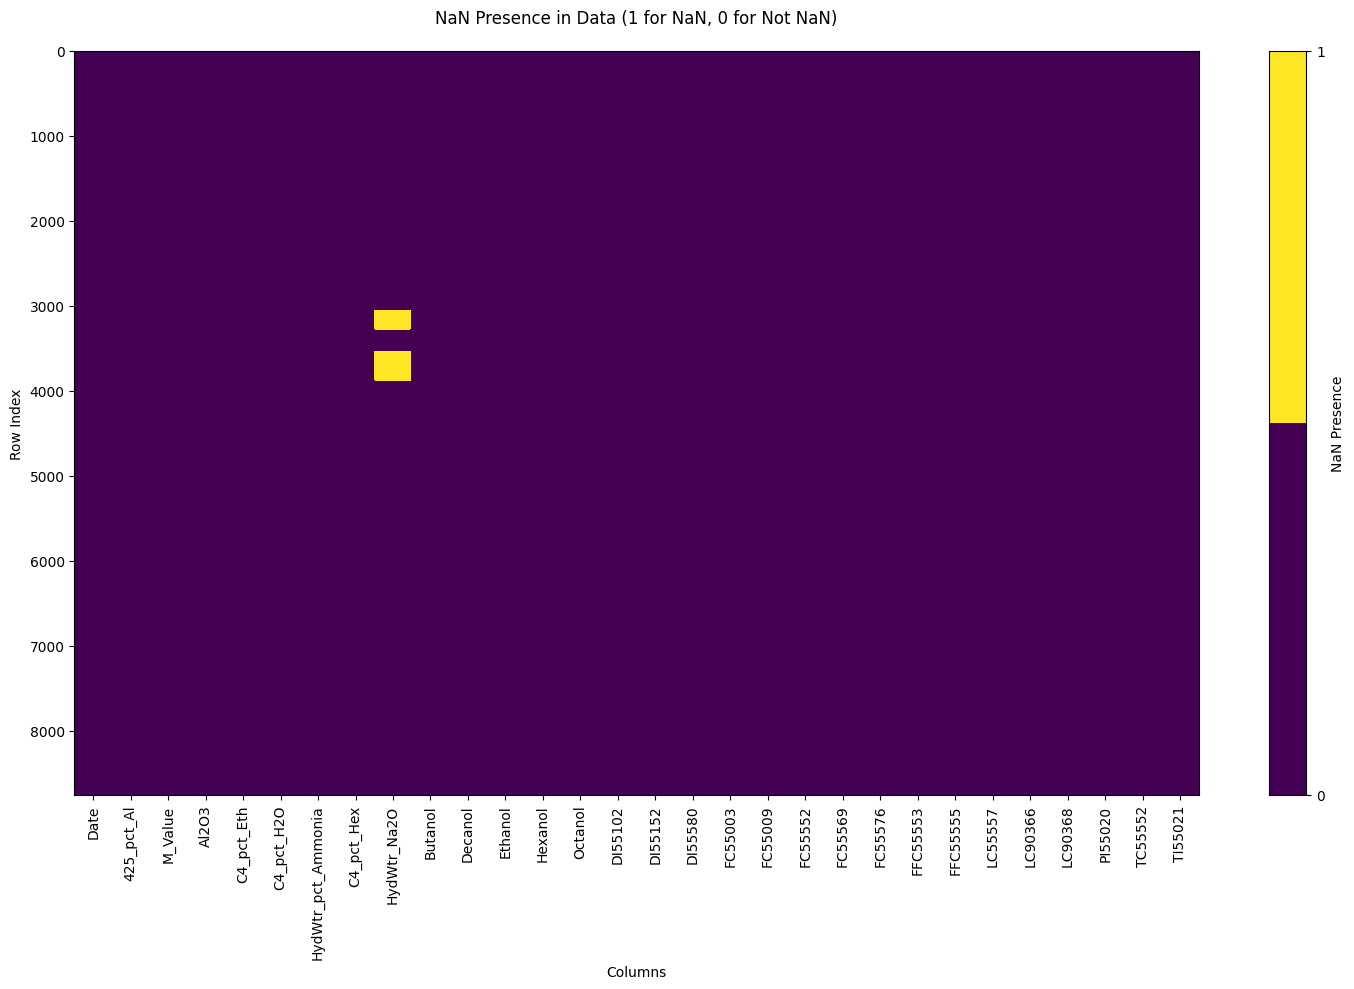

In [28]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_pivot.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_pivot.shape[1]), df_pivot.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [29]:
# Define a threshold for the percentage of NaN values
threshold = 40

# Drop columns with more than 'threshold' percentage of NaN values
nan_stats_filtered = nan_stats[nan_stats['nan_percentage'] <= threshold]

# Get the list of columns to keep
columns_to_keep = nan_stats_filtered['ID'].tolist()


df_pivot_50pct_nan_drop = df_pivot.drop(columns=columns_to_keep)


# Filter your original DataFrame (df_pivot) to keep only the selected columns
df_pivot = df_pivot[columns_to_keep]

# Now, df_pivot_filtered contains only columns with less than or equal to 50% NaN values.


### Dropped 
Because there wasn't enough viable data to process

Consider revisting source data, if final model inadequate


In [30]:
# Describe rationale in report WHY WASN'T FURTHER ANALYSIS CONDUCTED?
df_pivot_50pct_nan_drop.columns

Index([], dtype='object', name='ID')

In [31]:
# Columns to drop for df_toomanyNaN
#columns_toomanyNaN = ['HS52551', 'XV90911']
# 'TI55565A',

# Columns to drop from df_pivot
#columns_drop_pivot = ['DI52018', 'FC52018', 'FI55580', 'LC52572', 'TC52015', 'TC55566']

# 1. Create df_toomanyNaN with the specified columns
#df_toomanyNaN = df_pivot[columns_toomanyNaN].copy()

# 2. Create df_suspect which is df_pivot minus the problematic columns
#df_suspect = df_pivot.drop(columns=columns_toomanyNaN).copy()

# 3. Drop the columns from df_pivot
#df_pivot = df_pivot.drop(columns=columns_toomanyNaN)
# + columns_drop_pivot


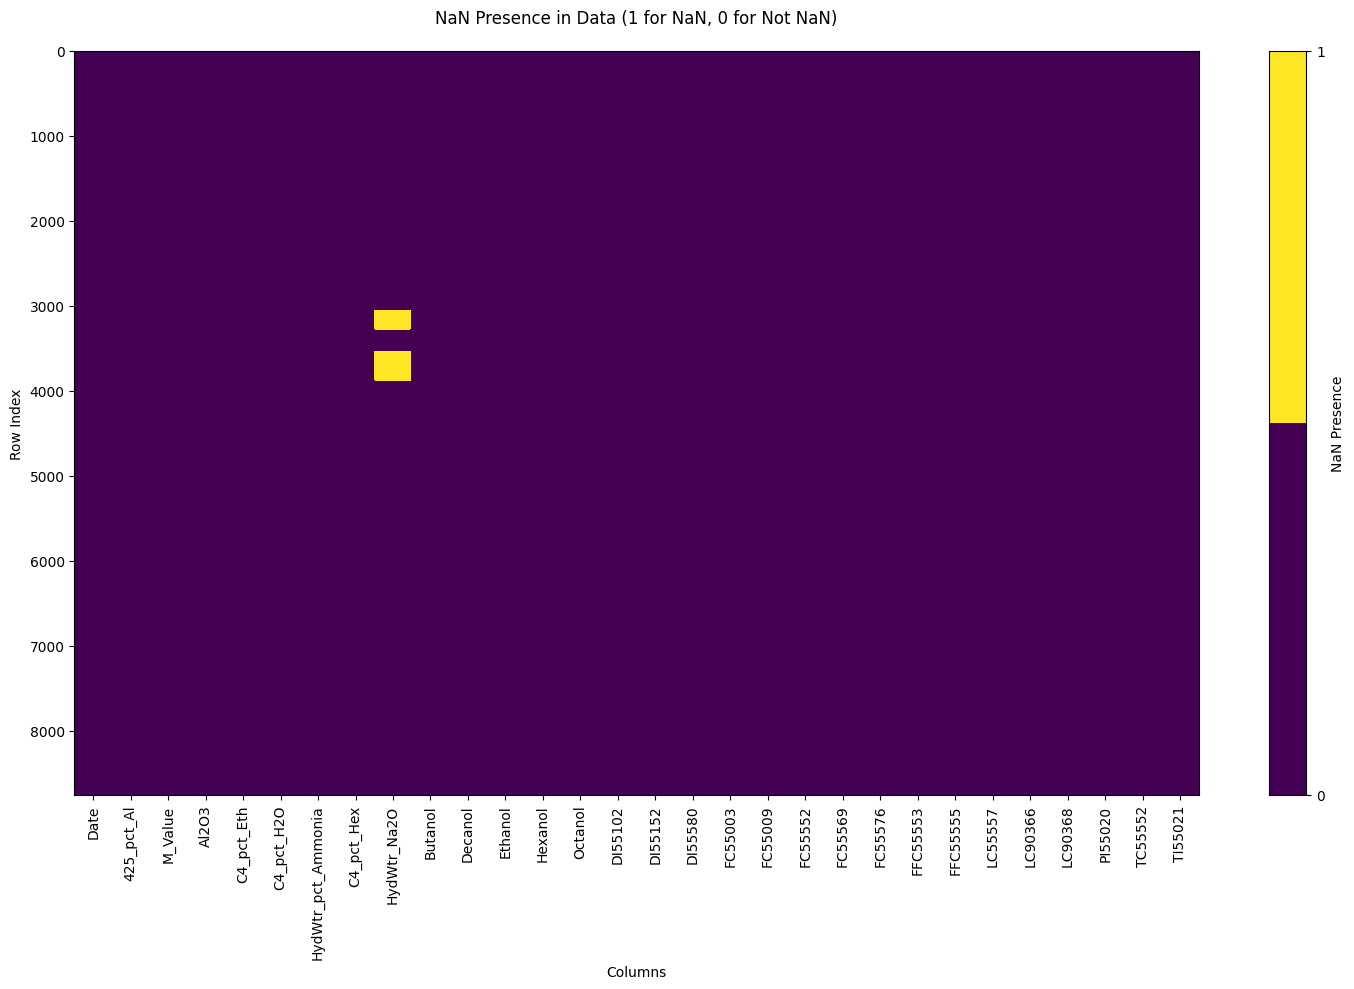

In [32]:


# Create a binary matrix to represent NaNs (1 for NaN, 0 for a number)
nan_matrix = np.where(df_pivot.isna(), 1, 0)

fig, ax = plt.subplots(figsize=(15, 10))  # Adjust the size as needed
cmap = plt.get_cmap('viridis', 2)  # We use a colormap that differentiates between 0 and 1 clearly

# Plotting heatmap
cax = ax.imshow(nan_matrix, cmap=cmap, aspect='auto')

# Adding colorbar for reference
plt.colorbar(cax, ticks=[0, 1], label='NaN Presence')
plt.title("NaN Presence in Data (1 for NaN, 0 for Not NaN)", pad=20)

# To make the columns readable and vertical
plt.xticks(range(df_pivot.shape[1]), df_pivot.columns, rotation=90)  # rotation set to 90 for vertical labels

plt.xlabel('Columns')
plt.ylabel('Row Index')

plt.tight_layout()
plt.show()


In [33]:
# Calculate the statistics for each column in df_pivot
total_rows = len(df_pivot)
non_nan_count = df_pivot.count()
nan_count = df_pivot.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_pivot.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)



                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date        8759           8759          0        0.000000
1           425_pct_Al        8759           8759          0        0.000000
2              M_Value        8759           8759          0        0.000000
3                Al2O3        8759           8759          0        0.000000
4           C4_pct_Eth        8759           8759          0        0.000000
5           C4_pct_H2O        8759           8759          0        0.000000
6   HydWtr_pct_Ammonia        8759           8759          0        0.000000
7           C4_pct_Hex        8759           8759          0        0.000000
8          HydWtr_Na2O        8759           8161        598        6.827263
9              Butanol        8759           8759          0        0.000000
10             Decanol        8759           8759          0        0.000000
11             Ethanol        8759           8759          0        0.000000

In [34]:
#Analysis of remaining NaNs suggests minimal impact - REMOVE

df_CD = df_pivot.dropna().copy()

# Calculate the statistics for each column in df_pivot
total_rows = len(df_CD)
non_nan_count = df_CD.count()
nan_count = df_CD.isnull().sum()
nan_percentage = (nan_count / total_rows) * 100

# Store these in a DataFrame
nan_stats = pd.DataFrame({
    'ID': df_CD.columns,
    'total_rows': total_rows,
    'non_nan_count': non_nan_count.values,
    'nan_count': nan_count.values,
    'nan_percentage': nan_percentage.values
})

print(nan_stats)

                    ID  total_rows  non_nan_count  nan_count  nan_percentage
0                 Date        8161           8161          0             0.0
1           425_pct_Al        8161           8161          0             0.0
2              M_Value        8161           8161          0             0.0
3                Al2O3        8161           8161          0             0.0
4           C4_pct_Eth        8161           8161          0             0.0
5           C4_pct_H2O        8161           8161          0             0.0
6   HydWtr_pct_Ammonia        8161           8161          0             0.0
7           C4_pct_Hex        8161           8161          0             0.0
8          HydWtr_Na2O        8161           8161          0             0.0
9              Butanol        8161           8161          0             0.0
10             Decanol        8161           8161          0             0.0
11             Ethanol        8161           8161          0             0.0

In [35]:
# 92515 Records - All duplicates removed - All NaNs removed


In [36]:


print(df_CD)


ID                  Date  425_pct_Al  M_Value    Al2O3  C4_pct_Eth  \
0    2023-01-01 00:00:00     6.15928  3.91438  10.7617     2.01591   
1    2023-01-01 01:00:00     6.15935  3.90927  10.7619     2.03131   
2    2023-01-01 02:00:00     6.15942  3.90664  10.7620     2.04672   
3    2023-01-01 03:00:00     6.15948  3.90402  10.7622     2.06212   
4    2023-01-01 04:00:00     6.15955  3.90139  10.7624     2.07753   
...                  ...         ...      ...      ...         ...   
8754 2023-12-31 19:00:00     6.45808  3.58701  12.2006     1.91533   
8755 2023-12-31 20:00:00     6.45686  3.58643  12.2009     1.92025   
8756 2023-12-31 21:00:00     6.45564  3.58585  12.2011     1.92517   
8757 2023-12-31 22:00:00     6.45442  3.58527  12.2013     1.93008   
8758 2023-12-31 23:00:00     6.45320  3.58470  12.2015     1.93500   

ID    C4_pct_H2O  HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O   Butanol  \
0        21.4310             1.17224    0.371104      3.03244   2.73000   
1        

In [37]:

print(df_CD.head())

# https://raw.githubusercontent.com/saust1/Project-OptiC4/main/1%20Preprocess/Continuous%20Data/contData_all.csv

# Save DataFrame to CSV file in the same directory as the Jupyter Notebook
# df_CD.to_csv(r'C:\Users\steve\OneDrive\1. BAIUTEK\Project-OptiC4\1 Preprocess\Continuous Data\contData_all.csv', index=False)

# Board workstation local copy
df_CD.to_csv(r'C:\Users\austinsh\Project-OptiC4\IV Optimize\Testing Data\Continuous Data 2023\contData_all.csv', index=False)


ID                Date  425_pct_Al  M_Value    Al2O3  C4_pct_Eth  C4_pct_H2O  \
0  2023-01-01 00:00:00     6.15928  3.91438  10.7617     2.01591     21.4310   
1  2023-01-01 01:00:00     6.15935  3.90927  10.7619     2.03131     21.4486   
2  2023-01-01 02:00:00     6.15942  3.90664  10.7620     2.04672     21.4661   
3  2023-01-01 03:00:00     6.15948  3.90402  10.7622     2.06212     21.4836   
4  2023-01-01 04:00:00     6.15955  3.90139  10.7624     2.07753     21.5012   

ID  HydWtr_pct_Ammonia  C4_pct_Hex  HydWtr_Na2O  Butanol  Decanol  Ethanol  \
0              1.17224    0.371104      3.03244  2.73000  1.82000  10.8350   
1              1.18665    0.375208      3.15657  2.87333  1.82667  11.3900   
2              1.20105    0.379313      3.28069  3.01667  1.83333  11.9450   
3              1.21545    0.383417      3.40482  3.16000  1.84000  12.5000   
4              1.22985    0.387521      3.52895  3.26833  1.75500  12.8033   

ID   Hexanol  Octanol   DI55102  DI55152  DI55580 

In [38]:
df_CD.describe()

ID,Date,425_pct_Al,M_Value,Al2O3,C4_pct_Eth,C4_pct_H2O,HydWtr_pct_Ammonia,C4_pct_Hex,HydWtr_Na2O,Butanol,Decanol,Ethanol,Hexanol,Octanol,DI55102,DI55152,DI55580,FC55003,FC55009,FC55552,FC55569,FC55576,FFC55553,FFC55555,LC55557,LC90366,LC90368,PI55020,TC55552,TI55021
count,8161,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8.161000e+03,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000
mean,2023-07-05 04:28:58.022301184,6.193773,3.650546,11.485166,1.762081,18.025234,0.898922,0.383161,2.399542,244.022440,28.586556,55.430684,14.548501,22.739163,0.819501,1.011492,0.973285,5272.411365,956.839403,29827.301515,5926.596966,310.047335,0.999751,8.144053e-01,66.860980,58.318058,57.440192,-0.453159,160.856786,210.758403
min,2023-01-01 00:00:00,3.824980,3.312470,10.761700,0.158000,13.980000,0.021000,0.008000,0.000000,0.900000,0.000000,0.610000,0.000000,0.360000,0.700010,0.742714,0.832187,-4765.740000,-2.629950,0.000000,1536.340000,-9.558900,0.171898,3.400000e-09,-0.626678,20.034500,21.459200,-6.209640,98.681400,58.300600
25%,2023-03-27 01:00:00,6.090640,3.570230,11.093700,1.443740,17.043200,0.842297,0.318568,0.501568,2.520000,1.670000,4.946670,0.995000,1.330000,0.794854,1.000190,0.955338,5028.130000,742.592000,29882.900000,6182.840000,92.944600,0.900077,7.794400e-01,62.993300,50.645600,49.679300,-0.768623,156.191000,221.728000
50%,2023-07-14 23:00:00,6.241520,3.637390,11.523000,1.712120,17.836300,0.926479,0.379619,1.664960,5.973330,2.706670,14.373300,1.361060,1.903330,0.794859,1.021820,0.984549,5710.700000,993.494000,34957.400000,6405.810000,322.229000,0.939271,7.869380e-01,72.914600,60.514000,60.575900,-0.284625,164.400000,225.191000
75%,2023-10-07 23:00:00,6.379020,3.735710,11.855100,1.965790,18.664200,1.024630,0.450111,1.952350,43.286700,4.701670,48.153300,2.530000,3.748950,0.794987,1.044980,0.999726,6302.190000,1266.370000,37297.800000,6699.950000,484.900000,0.971200,8.007940e-01,76.754000,66.373000,65.619900,0.003366,173.839000,227.891000
max,2023-12-31 23:00:00,7.353460,3.982330,12.201500,3.356900,25.218800,1.682630,0.921680,71.538400,12417.300000,1332.940000,1356.250000,443.039000,851.704000,1.197760,1.317090,1.033970,10974.800000,2671.660000,43342.900000,9321.450000,1373.070000,1.500000,1.000000e+00,95.256100,79.614000,77.438400,1.895150,213.521000,407.153000
std,NaN,0.377491,0.119335,0.424659,0.407291,1.480243,0.235034,0.111550,6.245893,779.634886,103.831289,110.726202,49.428905,84.594779,0.061531,0.062196,0.035387,1916.870564,507.429980,12359.611754,1582.549431,233.343163,0.202175,7.787216e-02,18.100469,10.342235,10.820053,0.684983,19.240529,44.035968


In [39]:
# # Ensure 'Date' is in datetime format
# df_CD['Date'] = pd.to_datetime(df_CD['Date'])

# # Calculate the difference between current and previous date-time
# df_CD['Time_Diff'] = df_CD['Date'].diff()

# # Find where 'Time_Diff' is greater than 1 hour
# gaps_over_one_hour = df_CD[df_CD['Time_Diff'] > pd.Timedelta(hours=1)]

# gaps_over_one_hour


In [40]:
num_columns = df_CD.shape[1]
print("Number of features:", num_columns)

Number of features: 30


After all Duplicates, NaNs, and inadequate record quantaties removed

57 Features remain

Outliers are to be addressed next

In [41]:
from datetime import datetime

# Get the current date and time
current_date_time = datetime.now()

# Print the current date and time
print(current_date_time)


2024-05-07 01:52:47.036124
